In [1]:
# Description: This program predicts the price of FB stock for a specific day

In [2]:
# Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving FB_1M_july20.csv to FB_1M_july20.csv


In [31]:
# Store and show the data
df = pd.read_csv('FB_1M_july20.csv')
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-01,228.500000,239.000000,227.559998,237.550003,237.550003,43399700
1,2020-07-02,239.000000,240.000000,232.610001,233.419998,233.419998,30633600
2,2020-07-06,233.759995,240.399994,232.270004,240.279999,240.279999,26206200
3,2020-07-07,239.410004,247.649994,238.820007,240.860001,240.860001,27887800
4,2020-07-08,238.110001,246.990005,236.589996,243.580002,243.580002,29791300
5,2020-07-09,245.000000,246.529999,239.240005,244.500000,244.500000,22174900
6,2020-07-10,243.690002,245.490005,239.320007,245.070007,245.070007,22982700
7,2020-07-13,247.009995,250.149994,238.419998,239.000000,239.000000,24674900
8,2020-07-14,236.759995,240.330002,232.029999,239.729996,239.729996,23378100
9,2020-07-15,241.550003,244.820007,238.050003,240.279999,240.279999,19133600


In [32]:
# Get the number of rows and columns
df.shape

(21, 7)

In [33]:
# Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-07-30,230.220001,234.889999,229.0,234.5,234.5,20615300


In [34]:
# Prepare the data for training the SVR models
# Get all of the data except for the last row
df = df.head(len(df)-1)
# Print the new data set
print(df)

          Date        Open        High  ...       Close   Adj Close    Volume
0   2020-07-01  228.500000  239.000000  ...  237.550003  237.550003  43399700
1   2020-07-02  239.000000  240.000000  ...  233.419998  233.419998  30633600
2   2020-07-06  233.759995  240.399994  ...  240.279999  240.279999  26206200
3   2020-07-07  239.410004  247.649994  ...  240.860001  240.860001  27887800
4   2020-07-08  238.110001  246.990005  ...  243.580002  243.580002  29791300
5   2020-07-09  245.000000  246.529999  ...  244.500000  244.500000  22174900
6   2020-07-10  243.690002  245.490005  ...  245.070007  245.070007  22982700
7   2020-07-13  247.009995  250.149994  ...  239.000000  239.000000  24674900
8   2020-07-14  236.759995  240.330002  ...  239.729996  239.729996  23378100
9   2020-07-15  241.550003  244.820007  ...  240.279999  240.279999  19133600
10  2020-07-16  238.000000  241.759995  ...  240.929993  240.929993  18880700
11  2020-07-17  241.000000  244.160004  ...  242.029999  242.029

In [35]:
# Create empty list to store the independent any dependent data
days = list()
adj_Close_prices = list()


In [36]:
# Get the date and adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [37]:
# Create the independent data set
for day in df_days:
  days.append([int(day.split('-')[2])])

# Create the dependent data set
for adj_close_price in df_adj_close:
  adj_Close_prices.append(float(adj_close_price))

In [38]:
# Print the days and the adj close prices
print(days)
print(adj_Close_prices)

[[1], [2], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [27], [28], [29]]
[237.55000299999998, 233.419998, 240.27999900000003, 240.86000099999998, 243.580002, 244.5, 245.07000699999998, 239.0, 239.729996, 240.27999900000003, 240.92999300000002, 242.02999900000003, 245.419998, 241.75, 239.86999500000002, 232.600006, 230.710007, 233.5, 230.11999500000002, 233.289993]


In [39]:
# Create the 3 Support Vector Regression Models

# Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_Close_prices)

# Create and train a SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)
poly_svr.fit(days, adj_Close_prices)

# Create and train a SVR model using a polynomial kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma = 0.15)
rbf_svr.fit(days, adj_Close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

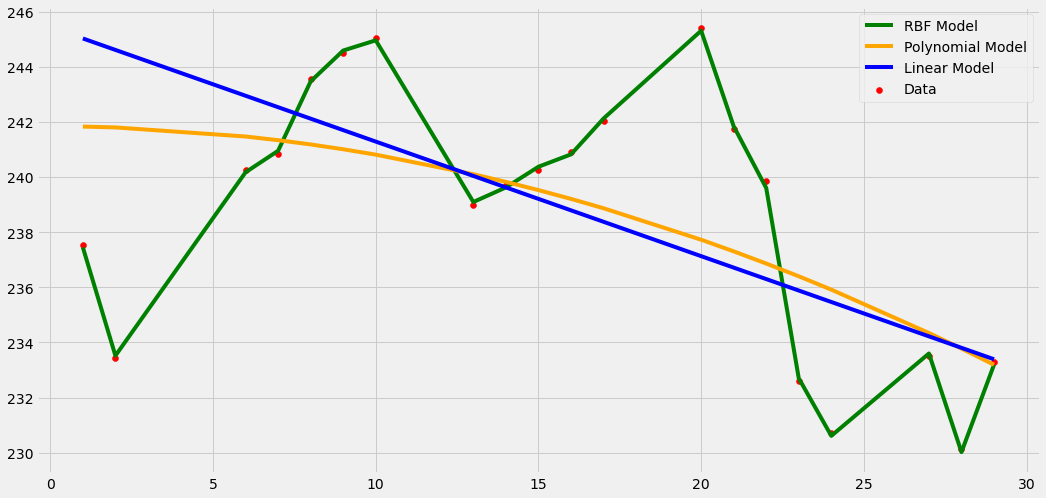

In [40]:
# Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(days, adj_Close_prices, color='red', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label ='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label ='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='blue', label ='Linear Model')
plt.legend()
plt.show()

In [41]:
# Show the predicted price for the given days
day = [[31]]

print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The RBF SVR predicted:  [240.04605652]
The Linear SVR predicted:  [232.5579926]
The Polynomial SVR predicted:  [231.95513047]


In [44]:
# Print the actual price of the stock on day 31
print('The actual price: ', actual_price['Adj Close'][20])

The actual price:  234.5
